## Реализация модели RNN
В данной работе необходимо реализовать модель глубокой рекуррентной нейронной сети,
используя набор данных продаж в супермаркете по наименованию.

### Подключаем модули и задаем название файла с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Flatten
from keras.optimizers import RMSprop
from keras import Input
from sklearn.metrics import mean_absolute_error

fname = 'data/bigmart.csv'

### Выводим верхние строчки таблицы и распределение данных</br>
Данные здесь содержат записи о продаже в супермаркете по наименованию продукта.
1. Item_Identifier: ID продукта
2. Item_Weight: Вес продукта
3. Item_Fat_Content: Содержание жиров (Low Far - низкие жиры, Regular - обычный)
4. Item_Visibility: Процент от общей площади магазина, выделенный под данный продукт
5. Item_Type: Категория, к которой принадлежит продукт
6. Item_MRP: Макисмальная розничная цена
7. Outlet_Identifier: ID магазина
8. Outlet_Establishment_Year: Год открытия магазина
9. Outlet_Size: Размер магазина по его площади
10. Outlet_Location_Type: Тип города, в котором находится магазин
11. Outlet_Type: Тип магазина (Овощной, супермаркет)
12. Item_Outlet_Sales: Продажи данного продукта в данном магазине

In [2]:
#Загрузка и очистка данных
df = pd.read_csv('data/bigmart.csv', sep=',', decimal='.', encoding='utf-8')
df = df.dropna()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


### Распределение данных

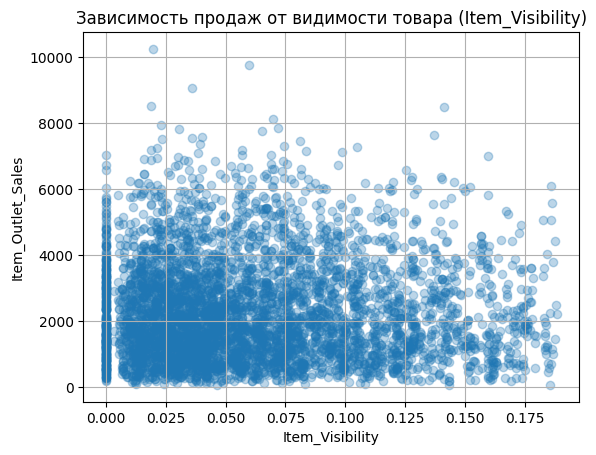

In [ ]:
#График изменения продаж в зависимости от видимости товара
plt.figure()
plt.scatter(df['Item_Visibility'], df['Item_Outlet_Sales'], alpha=0.3)
plt.title('Зависимость продаж от видимости товара (Item_Visibility)')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.grid(True)    
plt.show()

### Создадим RNN-модель и выведем график средней абсолютной ошибки для обучения и проверки

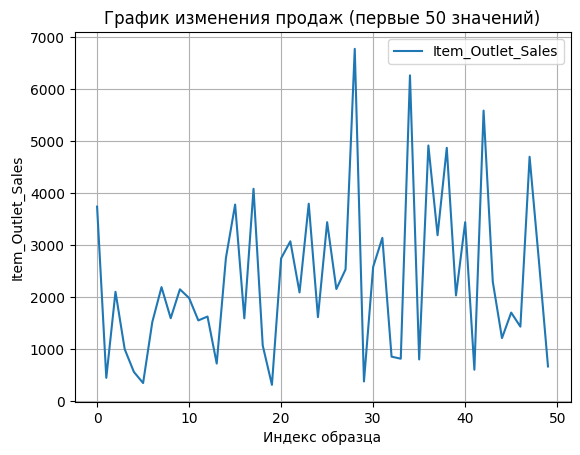

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2281.9426 - mae: 2281.9426 - val_loss: 2298.3167 - val_mae: 2298.3167
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2319.1003 - mae: 2319.1003 - val_loss: 2297.1316 - val_mae: 2297.1316
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2262.3003 - mae: 2262.3003 - val_loss: 2295.4175 - val_mae: 2295.4175
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2295.2671 - mae: 2295.2671 - val_loss: 2293.2546 - val_mae: 2293.2546
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2274.8733 - mae: 2274.8733 - val_loss: 2290.9866 - val_mae: 2290.9866
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2253.5935 - mae: 2253.5935 - val_loss: 2288.8047 - val_mae: 2288.8047
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2293.4287 - mae: 2293.4287 - val_loss: 2287.1235 - val_mae: 2287.1235
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2249.8784 - mae: 2249.8784 - val_loss: 2285.8

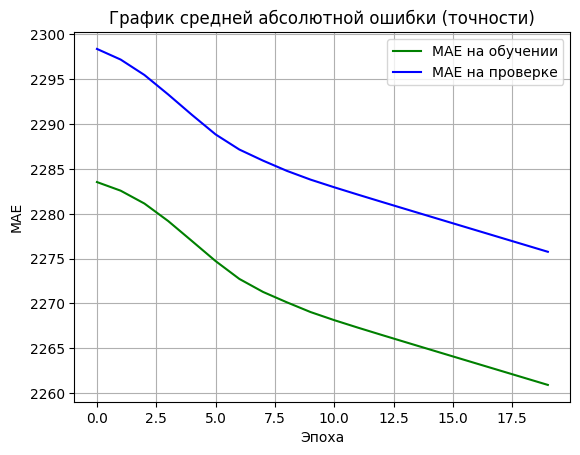

In [6]:
#Кодирование категориальных признаков
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
                    'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#Подготовка признаков
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'] + categorical_cols
target = 'Item_Outlet_Sales'

x = df[features].values
y = df[target].values

#Первые 50 значений набора
plt.figure()
plt.plot(range(50), y[:50], label='Item_Outlet_Sales')
plt.title('График изменения продаж (первые 50 значений)')
plt.xlabel('Индекс образца')
plt.ylabel('Item_Outlet_Sales')
plt.grid(True)
plt.legend()
plt.show()

#Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_rnn = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

#Разделение выборки
X_train, X_test, y_train, y_test = train_test_split(X_rnn, y, test_size=0.2, random_state=42)

#Модель глубокой RNN
model = Sequential()
model.add(Input(shape=(1, X_rnn.shape[2])))
model.add(SimpleRNN(64, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

#Обучение
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

#График MAE
plt.figure()
plt.plot(history.history['mae'], 'g', label='MAE на обучении')
plt.plot(history.history['val_mae'], 'b', label='MAE на проверке')
plt.title('График средней абсолютной ошибки (точности)')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

### В сравнении с полносвязной моделью в данной задаче

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2258.6897 - val_loss: 2298.5066
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2275.3230 - val_loss: 2298.0137
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2304.6340 - val_loss: 2297.5181
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2285.3550 - val_loss: 2297.0046
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2285.8018 - val_loss: 2296.4714
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2299.4958 - val_loss: 2295.9158
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2296.8601 - val_loss: 2295.3279
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2282.9443 - val_loss: 2294.7153
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2281.3821 - val_loss: 2294.0686
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2278.9346 - val_loss: 2293.3774
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2284.8289 - val_loss: 2292.6370
Epoch 12

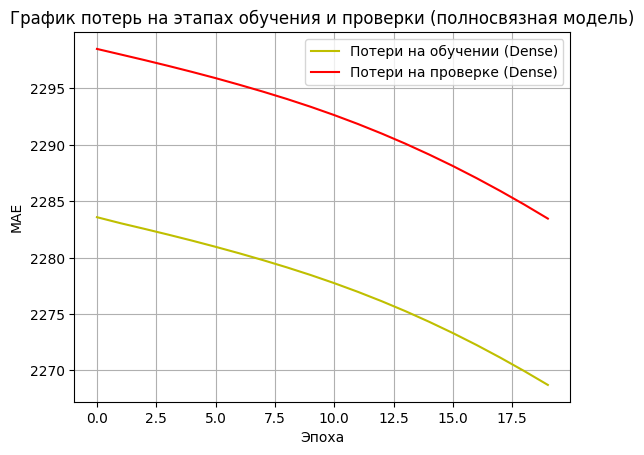

In [5]:
#Для сравнения обучим простую модель (без RNN)
model_dense = Sequential()
model_dense.add(Input(shape=(1, X_rnn.shape[2])))
model_dense.add(Flatten())
model_dense.add(Dense(32, activation='relu'))
model_dense.add(Dense(1))       
model_dense.compile(optimizer=RMSprop(), loss='mae')

history_dense = model_dense.fit(X_train, y_train,
                                epochs=20,
                                batch_size=128,
                                validation_split=0.2)

plt.figure()
plt.plot(history_dense.history['loss'], 'y', label='Потери на обучении (Dense)')
plt.plot(history_dense.history['val_loss'], 'r', label='Потери на проверке (Dense)')
plt.title('График потерь на этапах обучения и проверки (полносвязная модель)')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()